# Epsilon Experiments
This notebook is meant for tests of different epsilon values, and filtering big solution sets.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Define the subfoldername of the experiment of interest
experiment_names= ["nfe50000_None_1_demand", "nfe50000_None_01_demand"]

In [47]:
# Create an empty dictionary to store DataFrames
dfs = {}
e = 0
for name in experiment_names:
    print(name)
    subfolderpath = f"../outputs/{name}"  
    # Read the CSV file into a DataFrame
    df = pd.read_csv(f"{subfolderpath}/baseline_results_{name}.csv").drop(columns="Unnamed: 0")
    # Store the DataFrame in the dictionary with key 'e'
    dfs[e] = df
    e += 1  # Increment e for the next iteration (if necessary)

nfe50000_None_1_demand
nfe50000_None_01_demand


In [48]:
# Creating empty dictionaries to store df_policies and df_objectives for each experiment
df_policies_dict = {}
df_objectives_dict = {}

for name, df_solutions in dfs.items():
    # Separating columns into df_policies and df_objectives
    df_policies = df_solutions.iloc[:, :-6]  # Contains all columns except the last 6
    df_objectives = df_solutions.iloc[:, -6:]  # Contains the last 6 columns
    
    # Storing df_policies and df_objectives in dictionaries with experiment names as keys
    df_policies_dict[name] = df_policies
    df_objectives_dict[name] = df_objectives

In [49]:
# Displaying shape of each dataframe
for key, df in df_objectives_dict.items():
    print(f"\nPrinciple: {key}")
    print(f"Shape: {df.shape}")


Principle: 0
Shape: (5, 6)

Principle: 1
Shape: (884, 6)


In [50]:
def calculate_coefficient_of_variation(dataframe: pd.DataFrame, columns: list):
    """
    Calculate the coefficient of variation for selected columns in the input DataFrame and return a new DataFrame.

    The coefficient of variation (CV) measures the relative variability of a dataset, defined as the ratio
    of the standard deviation to the mean. It provides a standardized measure of dispersion.

    Args:
        dataframe (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names for which to calculate the coefficient of variation.

    Returns:
        pd.DataFrame: A new DataFrame with the selected columns replaced by their respective coefficient of variation.

    """
    df_cv = dataframe.copy()

    # Calculate the standard deviation for selected columns
    std_deviation = df_cv[columns].std()

    # Calculate the mean for selected columns
    mean = df_cv[columns].mean()

    # Calculate the coefficient of variation for selected columns
    df_cv[columns] = (df_cv[columns] - mean) / std_deviation

    return df_cv


In [51]:
# Dictionary to store coefficient of variation DataFrames
df_cv_objectives_dict = {}

# Iterate through the experiments in df_objectives_dict and calculate coefficient of variation
for name, df_objectives in df_objectives_dict.items():
    # List of columns for which to calculate the coefficient of variation
    columns_to_calculate_cv = df_objectives.columns.tolist()
    
    # Calculate coefficient of variation using the function
    df_cv_objectives = calculate_coefficient_of_variation(df_objectives, columns_to_calculate_cv)
    
    # Store the result in the dictionary with experiment names as keys
    df_cv_objectives_dict[name] = df_cv_objectives

In [54]:
# Displaying shape of each dataframe
for key, df in df_cv_objectives_dict.items():
    print(f"\nPrinciple: {key}")
    print(f"Shape: {df.shape}")


Principle: 0
Shape: (5, 6)

Principle: 1
Shape: (884, 6)


In [79]:
# Concatenate the CV DataFrames into a single DataFrame for visualization
df_cv_combined = pd.concat(df_cv_objectives_dict.values(), keys=df_cv_objectives_dict.keys())
df_cv_combined

egypt_agg_deficit_ratio  egypt_90p_deficit_ratio  \
0 0                  -0.212085                -0.297116   
  1                  -0.342276                -0.290981   
  2                  -0.609975                -0.597692   
  3                  -0.598502                -0.583279   
  4                   1.762837                 1.769068   
...                        ...                      ...   
1 879                -0.545989                -0.685041   
  880                -1.178660                -1.187377   
  881                -0.462638                -0.301366   
  882                -0.437411                -0.274811   
  883                -0.104858                 0.048221   

       egypt_low_had_frequency  sudan_agg_deficit_ratio  \
0 0                   0.726220                -0.568975   
  1                  -0.169120                -0.389419   
  2                   1.298242                -0.166752   
  3                  -0.790883                 1.759201   
  4                  -1.064459                -0.634055   
...                        ...                      ...   
1 879                 1.432565                 0.679173   
  880                -0.235156                 1.207615   
  881                -0.481524                 0.580714   
  882                -1.012162                 0.519071   
  883                -0.348864                 0.810506   

       sudan_90p_deficit_ratio  ethiopia_agg_deficit_ratio  
0 0                   1.031425                    0.504574  
  1                   1.138552                    1.392580  
  2                  -0.773919                   -0.363333  
  3                  -0.515791                   -0.268006  
  4                  -0.880268                   -1.265815  
...                        ...                         ...  
1 879                 0.435828                   -0.538368  
  880                 0.986498                    0.331922  
  881                -1.158461                   -0.136674  
  882                 0.981378                    1.585310  
  883                 0.297143                   -0.550674  

[889 rows x 6 columns]

In [80]:
# Reset the index and drop the second level
df_cv_combined = df_cv_combined.reset_index(level=1, drop=True)
df_cv_combined

,egypt_agg_deficit_ratio,egypt_90p_deficit_ratio,egypt_low_had_frequency,sudan_agg_deficit_ratio,sudan_90p_deficit_ratio,ethiopia_agg_deficit_ratio
0,-0.212085,-0.297116,0.726220,-0.568975,1.031425,0.504574
0,-0.342276,-0.290981,-0.169120,-0.389419,1.138552,1.392580
0,-0.609975,-0.597692,1.298242,-0.166752,-0.773919,-0.363333
0,-0.598502,-0.583279,-0.790883,1.759201,-0.515791,-0.268006
0,1.762837,1.769068,-1.064459,-0.634055,-0.880268,-1.265815
...,...,...,...,...,...,...
1,-0.545989,-0.685041,1.432565,0.679173,0.435828,-0.538368
1,-1.178660,-1.187377,-0.235156,1.207615,0.986498,0.331922
1,-0.462638,-0.301366,-0.481524,0.580714,-1.158461,-0.136674
1,-0.437411,-0.274811,-1.012162,0.519071,0.981378,1.585310


In [94]:
# Melt the DataFrame to long format for easier plotting
melted_df = df_cv_combined.reset_index().melt(id_vars='index', var_name='Objective', value_name='Coefficient of Variation')
melted_df

,index,Objective,Coefficient of Variation
0,0,egypt_agg_deficit_ratio,-0.212085
1,0,egypt_agg_deficit_ratio,-0.342276
2,0,egypt_agg_deficit_ratio,-0.609975
3,0,egypt_agg_deficit_ratio,-0.598502
4,0,egypt_agg_deficit_ratio,1.762837
...,...,...,...
5329,1,ethiopia_agg_deficit_ratio,-0.538368
5330,1,ethiopia_agg_deficit_ratio,0.331922
5331,1,ethiopia_agg_deficit_ratio,-0.136674
5332,1,ethiopia_agg_deficit_ratio,1.585310


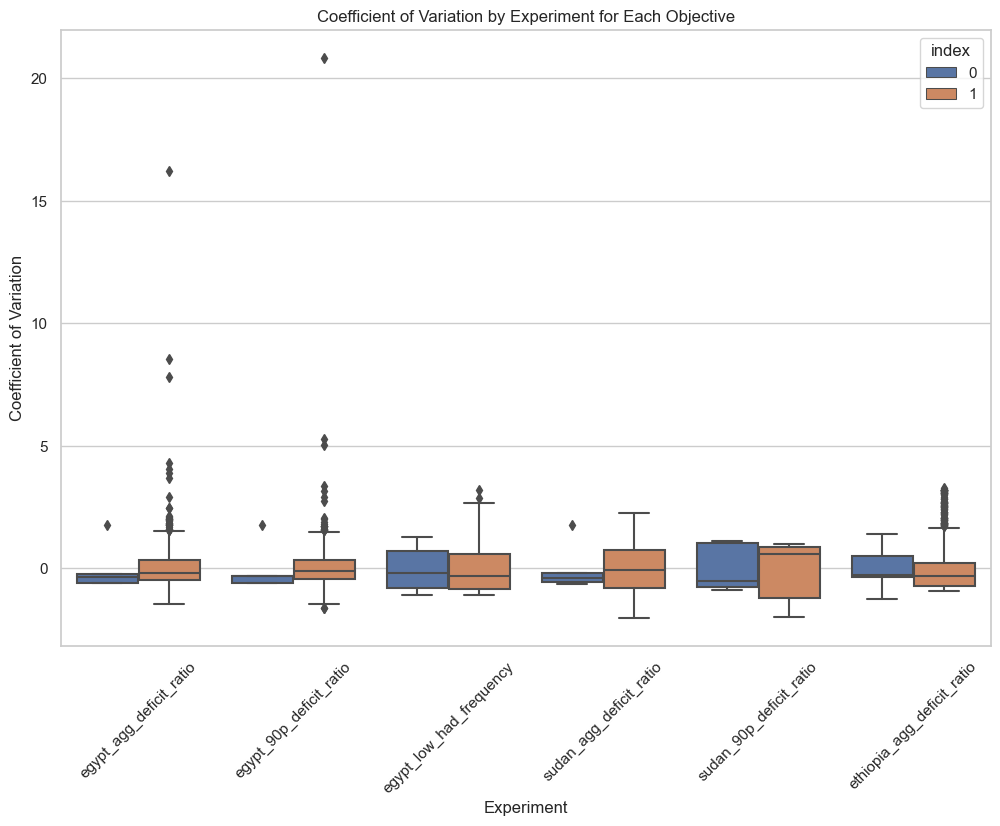

In [95]:
# Create a boxplot using seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(x='Objective', y='Coefficient of Variation', hue='index', data=melted_df)
plt.title('Coefficient of Variation by Experiment for Each Objective')
plt.xlabel('Experiment')
plt.ylabel('Coefficient of Variation')
plt.xticks(rotation=45)
plt.show()